# Datenexploration

In [7]:
from load_data import load_data_from_influxdb, create_data_windows, split_X_y

import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

In [8]:
sensor_data = load_data_from_influxdb()
data_windows = create_data_windows(sensor_data, '2000ms')

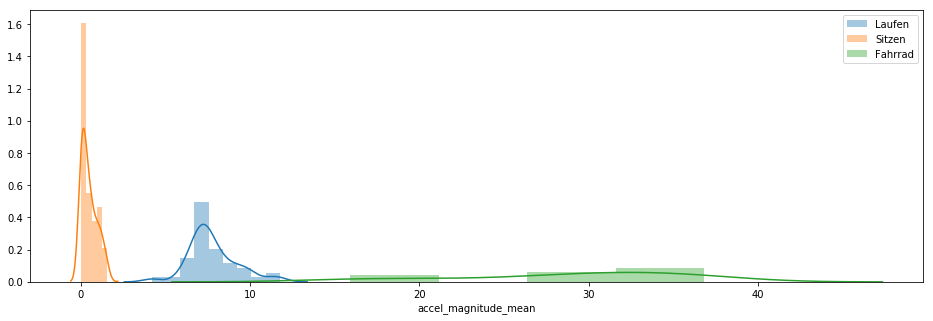

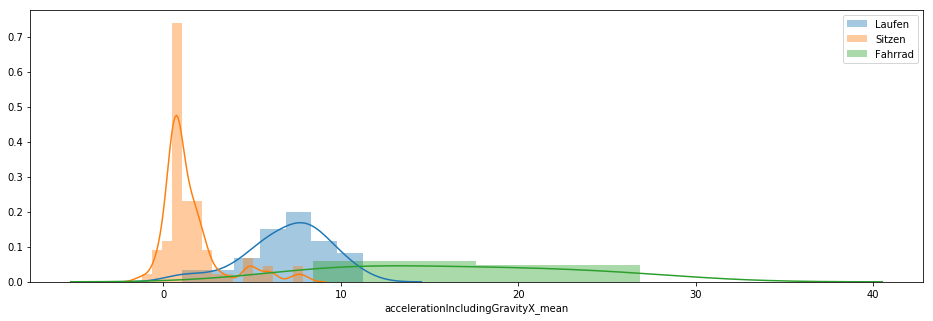

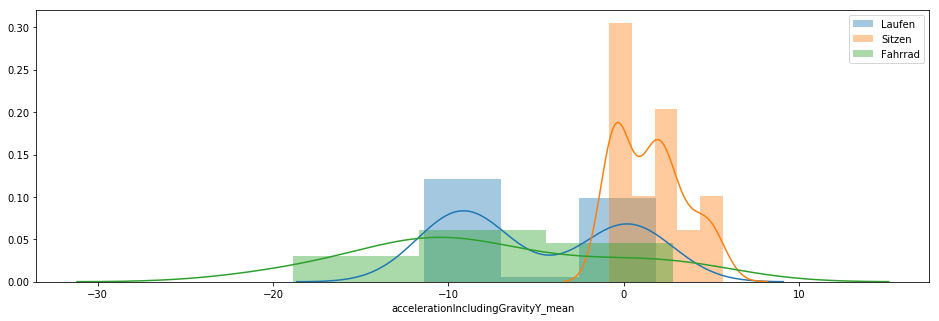

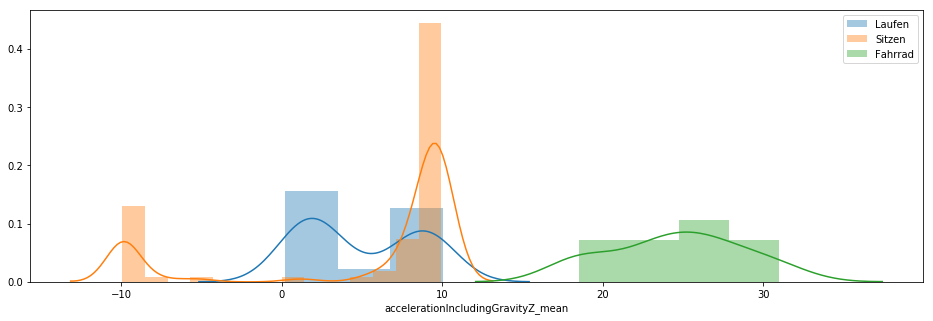

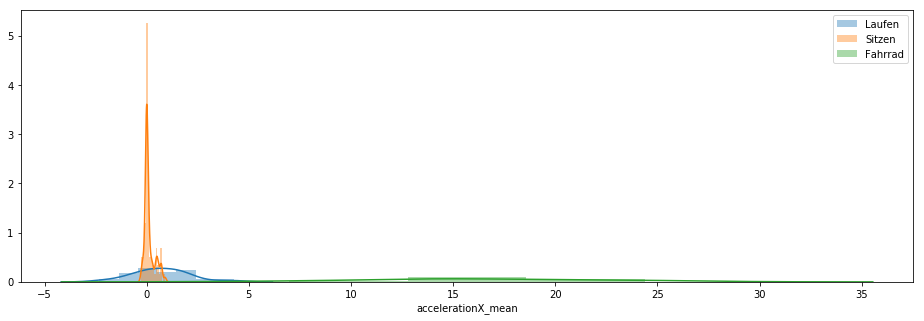

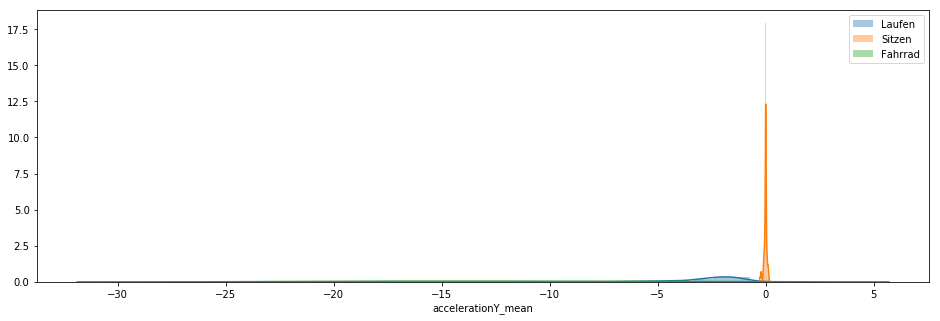

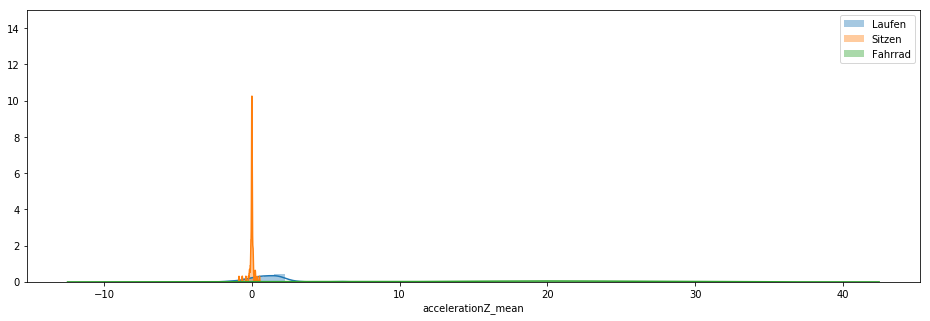

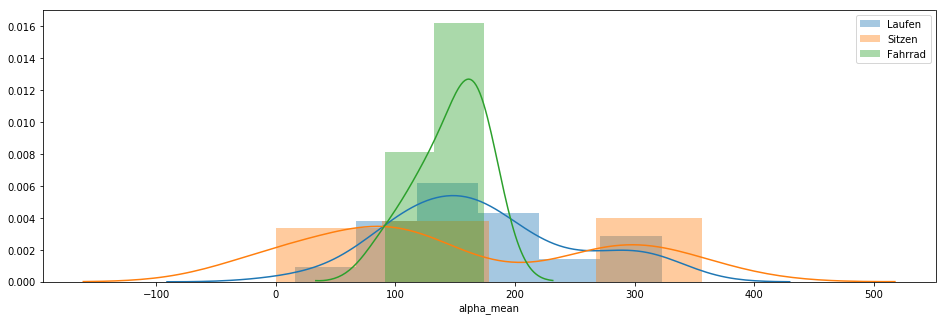

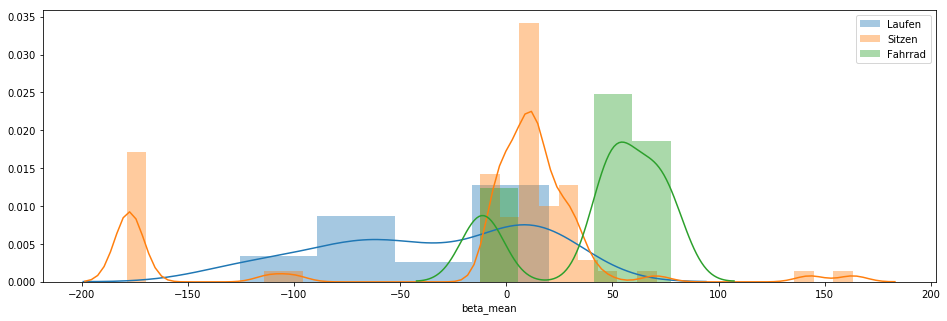

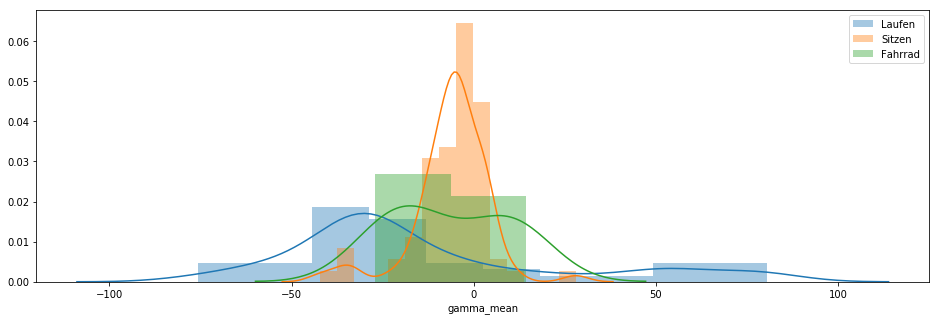

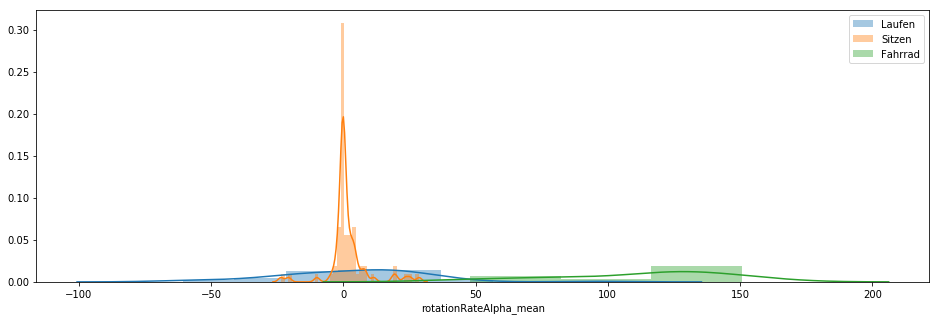

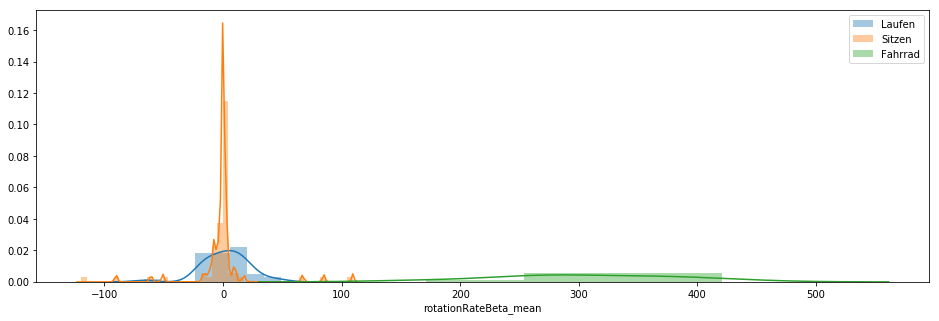

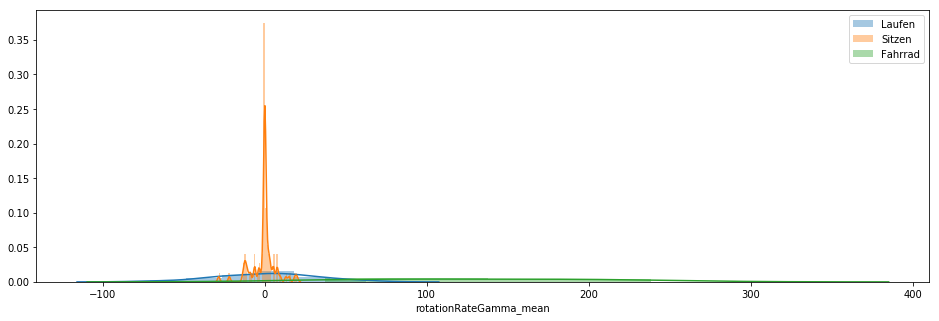

In [9]:
for col in data_windows:
    if "mean" in col:
        plt.figure(figsize=(16,5))
        sns.distplot(data_windows[data_windows["context"] == "Laufen"][col], label="Laufen")
        sns.distplot(data_windows[data_windows["context"] == "Sitzen"][col], label="Sitzen")
        sns.distplot(data_windows[data_windows["context"] == "Fahrrad"][col], label="Fahrrad")
        plt.legend()
        
        

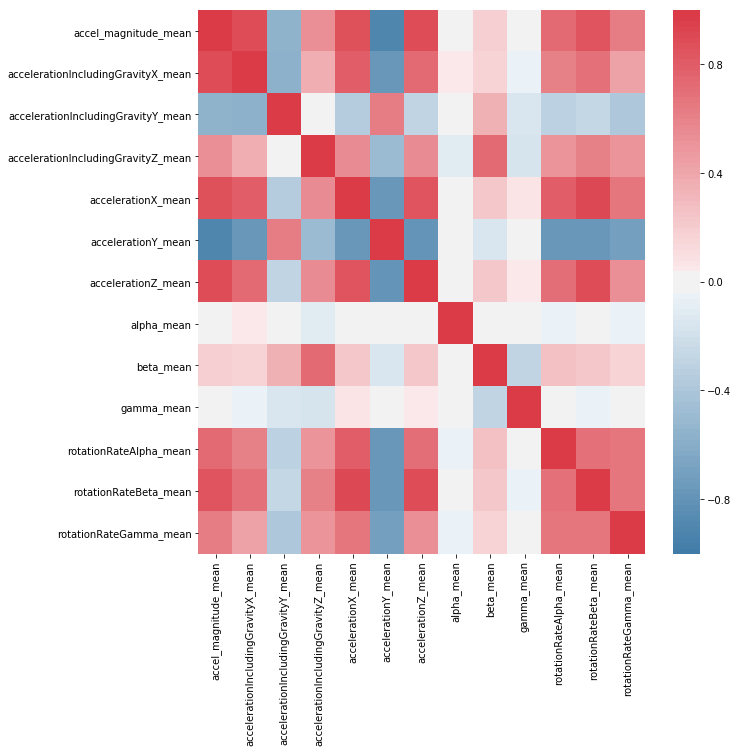

In [10]:
mean_features = [column for column in data_windows.columns if "mean" in column]
corr_pearson = data_windows[mean_features].corr('pearson')
cmap = sns.diverging_palette(240, 10, n=100)
plt.figure(figsize=(10,10))
sns.heatmap(corr_pearson,
            xticklabels=corr_pearson.columns.values,
            yticklabels=corr_pearson.columns.values, cmap=cmap, vmin=-1, vmax=1);

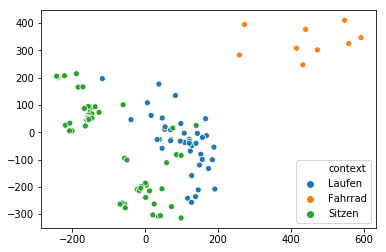

In [11]:
X = data_windows.drop(['context','subject'], axis=1).to_numpy()
X_transformed = PCA(n_components=2).fit_transform(X)
sns.scatterplot(
    x=X_transformed[:,0],
    y=X_transformed[:,1],
    hue=data_windows["context"],
    legend="full"
);